In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")


### Reading data:

In [2]:
airlines_files=pd.read_excel('C:\\Users\\JOTHISH N\\Desktop\\DS\\CLUSTERING\\EastWestAirlines.xlsx',sheet_name='data')

In [3]:
airlines_files

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
airlines_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
#There are no null values

In [6]:
# checking for duplicate values
airlines_files[airlines_files.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [7]:
# There are no duplicate values

In [8]:
r1=(0+5000)/2
r2=(10000+5001)/2
r3=(10001+25000)/2
r4=(25001+50000)/2
r5=75000

In [9]:
airlines_files

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


### Dropping unwanted columns

In [10]:
airlines_files.drop('ID#',axis=1,inplace=True)

In [11]:
airlines_mod=airlines_files.copy()

In [12]:
airlines_mod.cc1_miles[airlines_mod.cc1_miles==1]=r1
airlines_mod.cc1_miles[airlines_mod.cc1_miles==2]=r2
airlines_mod.cc1_miles[airlines_mod.cc1_miles==3]=r3
airlines_mod.cc1_miles[airlines_mod.cc1_miles==4]=r4
airlines_mod.cc1_miles[airlines_mod.cc1_miles==5]=r5
airlines_mod.cc2_miles[airlines_mod.cc2_miles==1]=r1
airlines_mod.cc2_miles[airlines_mod.cc2_miles==2]=r2
airlines_mod.cc2_miles[airlines_mod.cc2_miles==3]=r3
airlines_mod.cc2_miles[airlines_mod.cc2_miles==4]=r4
airlines_mod.cc2_miles[airlines_mod.cc2_miles==5]=r5
airlines_mod.cc3_miles[airlines_mod.cc3_miles==1]=r1
airlines_mod.cc3_miles[airlines_mod.cc3_miles==2]=r2
airlines_mod.cc3_miles[airlines_mod.cc3_miles==3]=r3
airlines_mod.cc3_miles[airlines_mod.cc3_miles==4]=r4
airlines_mod.cc3_miles[airlines_mod.cc3_miles==5]=r5

### Scaling data

In [13]:
ss=StandardScaler()
x=ss.fit_transform(airlines_mod)

In [14]:
airlines_mod

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,2500.0,2500.0,2500.0,174,1,0,0,7000,0
1,19244,0,2500.0,2500.0,2500.0,215,2,0,0,6968,0
2,41354,0,2500.0,2500.0,2500.0,4123,4,0,0,7034,0
3,14776,0,2500.0,2500.0,2500.0,500,1,0,0,6952,0
4,97752,0,37500.5,2500.0,2500.0,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,2500.0,2500.0,2500.0,8525,4,200,1,1403,1
3995,64385,0,2500.0,2500.0,2500.0,981,5,0,0,1395,1
3996,73597,0,17500.5,2500.0,2500.0,25447,8,0,0,1402,1
3997,54899,0,2500.0,2500.0,2500.0,500,1,500,1,1401,0


In [15]:
# Hierarchial Clustering
# Dendogram

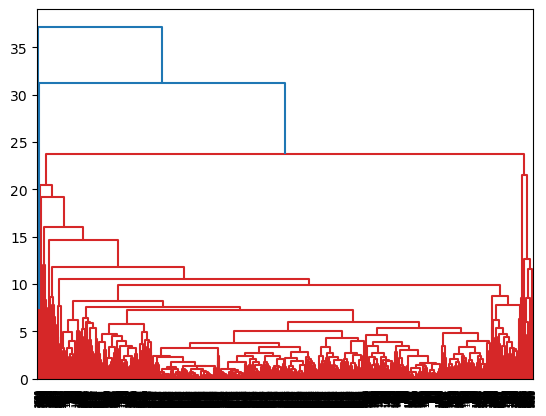

In [46]:
dendrogram = sch.dendrogram(sch.linkage(x,metric='euclidean',method='complete'))

In [47]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
y_hc=hc.fit_predict(airlines_mod)
airlines_mod['cluster_id']=pd.Series(y_hc)
airlines_mod.cluster_id.value_counts()

0    3989
1       9
2       1
Name: cluster_id, dtype: int64

In [48]:
hc4 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
y_hc=hc4.fit_predict(airlines_mod)
airlines_mod['cluster_id']=pd.Series(y_hc)
airlines_mod.cluster_id.value_counts()

1    3944
3      45
0       9
2       1
Name: cluster_id, dtype: int64

In [49]:
hc5 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
y_hc=hc5.fit_predict(airlines_mod)
airlines_mod['cluster_id']=pd.Series(y_hc)
airlines_mod.cluster_id.value_counts()

0    3944
1      45
3       5
4       4
2       1
Name: cluster_id, dtype: int64

In [51]:
# Trying with 3,4 or 5 clusters doesnt produce satisfactory results

In [52]:
#Trying with cosine as distance instead of euclidean distance

### Dendogram

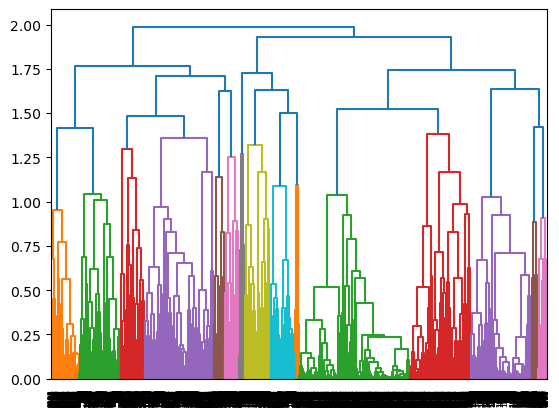

In [53]:
dendrogram = sch.dendrogram(sch.linkage(x,metric='cosine',method='complete'))

### Building model with 3 clusters

In [54]:
hc = AgglomerativeClustering(n_clusters=3, affinity ='cosine' , linkage = 'complete')
hc

AgglomerativeClustering(affinity='cosine', linkage='complete', n_clusters=3)

In [72]:
y_hc=hc.fit_predict(airlines_mod)

In [73]:
y_hc

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [74]:
airlines_mod['cluster_id']=pd.Series(y_hc)

In [75]:
airlines_mod.cluster_id.value_counts()

1    3342
2     345
0     312
Name: cluster_id, dtype: int64

In [76]:
x

array([[-4.51140783e-01, -1.86298687e-01, -6.08427105e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -6.08427105e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -6.08427105e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  1.23419619e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -6.08427105e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -6.08427105e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [77]:
airlines_mod.groupby('cluster_id').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster_id,,,,,,,,,,,
0,4841.201923,11.429487,2628.217949,3092.975962,2500.000000,2000.525641,4.067308,156.807692,0.483974,3641.631410,0.205128
1,84019.481448,157.434171,13566.905147,2552.367594,2601.736834,15443.987433,11.570616,472.104428,1.418312,4129.682226,0.326451
2,34864.194203,135.081159,39732.202899,2514.494203,3391.310145,47316.724638,18.718841,617.582609,1.744928,4442.121739,0.944928


In [78]:
#The means with respect to the clusters give clearly distinct results

## K-means clustering

In [79]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(airlines_mod)
    wcss.append(kmeans.inertia_)

    
    
plt.plot(range(1,11),wcss) 
plt.title("Elbow Method")
plt.xlabel('Number of clusters') 
plt.ylabel('wcss')
plt.show()


AttributeError: 'NoneType' object has no attribute 'split'

### Trying with 4 clusters

In [81]:
clusters_new=KMeans(n_clusters=4,random_state=0)

In [82]:
clusters_new.fit(airlines_mod)

KMeans(n_clusters=4, random_state=0)

In [83]:
pd.Series(clusters_new.labels_).value_counts()

1    2780
0    1006
3     187
2      26
dtype: int64

In [84]:
airlines_mod2=airlines_mod.copy()

In [85]:
airlines_mod2['cluster_id_kmeans']=clusters_new.labels_

In [86]:
airlines_mod2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id,cluster_id_kmeans
0,28143,0,2500.0,2500.0,2500.0,174,1,0,0,7000,0,1,1
1,19244,0,2500.0,2500.0,2500.0,215,2,0,0,6968,0,1,1
2,41354,0,2500.0,2500.0,2500.0,4123,4,0,0,7034,0,1,1
3,14776,0,2500.0,2500.0,2500.0,500,1,0,0,6952,0,1,1
4,97752,0,37500.5,2500.0,2500.0,43300,26,2077,4,6935,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,2500.0,2500.0,2500.0,8525,4,200,1,1403,1,1,1
3995,64385,0,2500.0,2500.0,2500.0,981,5,0,0,1395,1,1,1
3996,73597,0,17500.5,2500.0,2500.0,25447,8,0,0,1402,1,1,1
3997,54899,0,2500.0,2500.0,2500.0,500,1,500,1,1401,0,1,1


In [87]:
airlines_mod2.groupby('cluster_id_kmeans').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
cluster_id_kmeans,,,,,,,,,,,,
0,126306.643141,218.553678,28596.195328,2554.674453,2895.134195,32049.510934,16.750497,743.281312,2.126243,4726.197813,0.451292,1.060636
1,30635.471223,100.981295,8553.200180,2606.121403,2577.338489,9567.453957,9.165468,290.040288,0.881655,3780.930935,0.319424,0.989928
2,842320.230769,512.692308,39519.365385,2500.000000,3846.173077,57797.192308,22.730769,1845.884615,6.961538,6463.000000,0.846154,1.000000
3,321926.684492,333.641711,33663.307487,2580.221925,2500.000000,43958.197861,18.577540,1271.213904,3.860963,5542.983957,0.625668,1.000000


### The means are sufficiently different

### Applying dbscan clustering

In [88]:
x

array([[-4.51140783e-01, -1.86298687e-01, -6.08427105e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -6.08427105e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -6.08427105e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  1.23419619e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -6.08427105e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -6.08427105e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [89]:
airlines_mod3=airlines_mod.copy()

In [90]:
dbscan = DBSCAN(eps=2.0, min_samples=20)
dbscan.fit(x)

DBSCAN(eps=2.0, min_samples=20)

In [91]:
airlines_mod['cluster_id_dbscan']=pd.Series(dbscan.labels_)

In [92]:
airlines_mod.cluster_id_dbscan.value_counts()

 0    2432
 1    1280
-1     287
Name: cluster_id_dbscan, dtype: int64

In [93]:
X=metrics.silhouette_score(x,dbscan.labels_)
X

0.25989805005870703

In [94]:
def Dbscan(X,eps,min_samples):
    db=DBSCAN(eps=eps,min_samples=min_samples)
    db.fit(X)
    y_pred=db.fit_predict(X)
    plt.scatter(X[:,0],X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

### Plotting the graph for eps 2 and min_samples 8

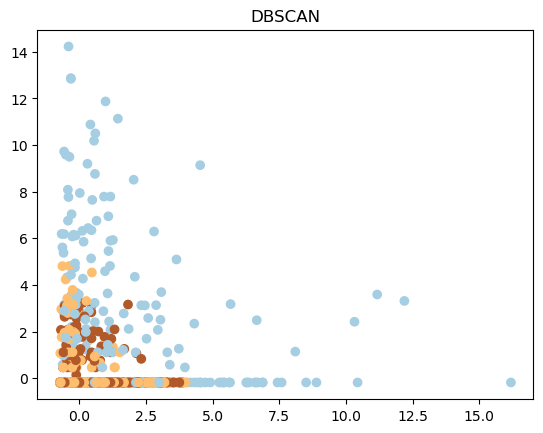

In [95]:
Dbscan(x,2,20)

In [96]:
airlines_mod.groupby('cluster_id_dbscan').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
cluster_id_dbscan,,,,,,,,,,,,
-1,211522.372822,1416.522648,26054.153310,3771.851916,4703.850174,44293.425087,24.254355,2983.822300,8.616725,4701.456446,0.700348,1.052265
0,57221.907484,34.654194,9670.168586,2500.000000,2504.112253,9707.329770,8.837171,182.018914,0.540296,3811.555510,0.000000,0.909128
1,73797.741406,66.791406,22556.889844,2500.000000,2503.906641,25188.907031,14.017969,422.450000,1.332812,4571.170313,1.000000,1.186719


#Clustering was done with best results with 3 clusters for hierarchical clustering, 4 clusters with kmeans and 3 clusters including outliers with DBSCAN